<a href="https://colab.research.google.com/github/brunasil98/Colab_Semiconductor/blob/main/Test_3_192_DO1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')
#############################################################
import tensorflow.keras.utils as conv_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf
#from keras import backend as K
####################################################
import os
import cv2

from PIL import Image
import numpy as np

In [5]:
image_directory = r'drive/MyDrive/Youtube_Neural_Network/'
SIZE = 192
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

Error = os.listdir(image_directory + 'Error/')
for i, image_name in enumerate(Error):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread (image_directory + 'Error/' + image_name, cv2.IMREAD_GRAYSCALE)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)
   

In [6]:
Non_error = os.listdir(image_directory + 'Non_error/')
for i, image_name in enumerate(Non_error):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'Non_error/' + image_name,cv2.IMREAD_GRAYSCALE)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [8]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 25)

In [9]:
X_train = np.array(X_train)
X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],1)
y_train = np.array(y_train)
y_train = y_train.reshape(len(y_train),1)
X_test = np.array(X_test)
X_test = X_test.reshape(len(X_test),X_test.shape[1],X_test.shape[2],1)
y_test = np.array(y_test)
y_test = y_test.reshape(len(y_test),1)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(285, 192, 192, 1)
(285, 1)
(72, 192, 192, 1)
(72, 1)


In [11]:

X_train = conv_utils.normalize(X_train)
X_test = conv_utils.normalize(X_test)

In [12]:
INPUT_SHAPE = (SIZE, SIZE, 1)   #change to (SIZE, SIZE, 1)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())



model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.add(BatchNormalization()) 

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             #also try adam
              metrics=['acc'])

print(model.summary())    
###############################################################  


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 190, 190, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 190, 190, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 95, 95, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 95, 95, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 93, 93, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 93, 93, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(285, 192, 192, 1)
(285, 1)
(72, 192, 192, 1)
(72, 1)


In [15]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 285, 
                         verbose = 1, 
                         epochs = 100,      
                         validation_split= 0.1,
                         shuffle = True
                     )




Epoch 1/100
1/1 [==============================] - 28s 28s/step - loss: 6.1839 - acc: 0.4727 - val_loss: 0.7260 - val_acc: 0.5172
Epoch 2/100
1/1 [==============================] - 8s 8s/step - loss: 5.4988 - acc: 0.5547 - val_loss: 0.7203 - val_acc: 0.4483
Epoch 3/100
1/1 [==============================] - 8s 8s/step - loss: 5.6881 - acc: 0.5273 - val_loss: 0.9173 - val_acc: 0.5517
Epoch 4/100
1/1 [==============================] - 8s 8s/step - loss: 5.0989 - acc: 0.5625 - val_loss: 1.0136 - val_acc: 0.5517
Epoch 5/100
1/1 [==============================] - 8s 8s/step - loss: 5.5447 - acc: 0.5703 - val_loss: 0.9147 - val_acc: 0.5517
Epoch 6/100
1/1 [==============================] - 8s 8s/step - loss: 4.3915 - acc: 0.5625 - val_loss: 0.9003 - val_acc: 0.5517
Epoch 7/100
1/1 [==============================] - 8s 8s/step - loss: 4.0226 - acc: 0.6016 - val_loss: 0.6714 - val_acc: 0.5172
Epoch 8/100
1/1 [==============================] - 8s 8s/step - loss: 4.2522 - acc: 0.6133 - val_loss:

KeyboardInterrupt: ignored

In [ ]:

model.save('semiconductor_model3_194_50epochs_2.h5')  

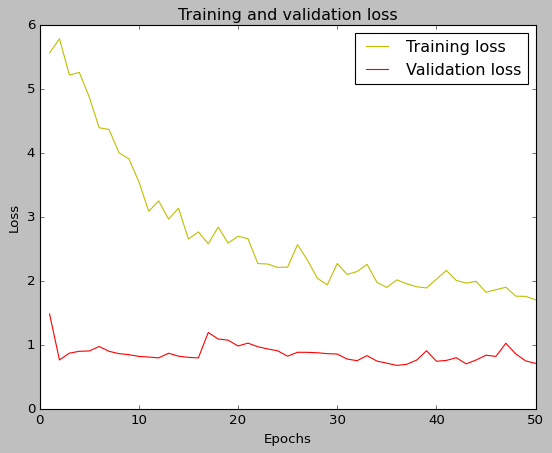

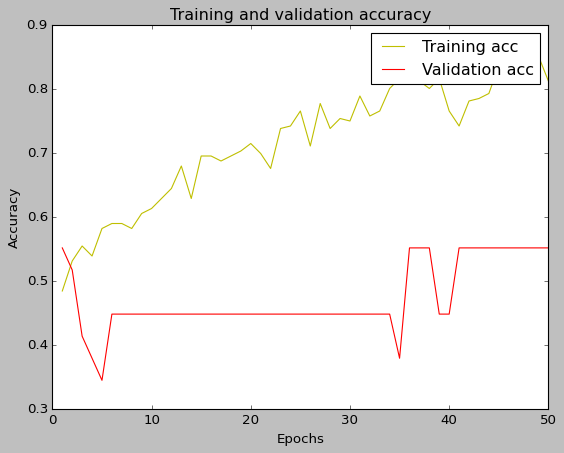

In [ ]:

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

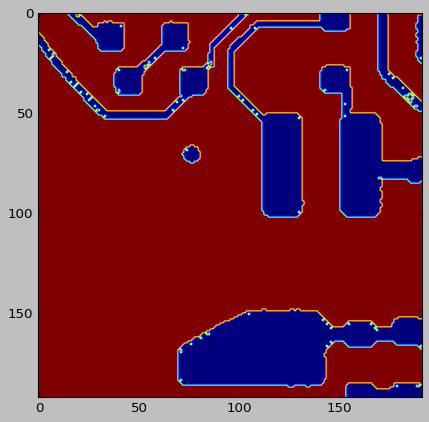

In [ ]:
n=23  #Select the index of image to be loaded for testing
#Image_Non_Error 440000062 = number 23
#Image_Error 440000036 = number 10

img = X_test[n]
plt.imshow(tf.squeeze(img) )

In [ ]:
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

The prediction for this image is:  [[-0.9074702]]
The actual label for this image is:  [0]


In [ ]:
from keras.models import load_model
# # load model
model = load_model('semiconductor_model3_194_300epochs_2.h5')



In [ ]:

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

3/3 [==============================] - 2s 227ms/step - loss: 0.4830 - acc: 0.9583
Accuracy =  95.83333134651184 %
